# Approach


# Note
In Python, a shallow copy creates a new object that is a copy of the original object, but the elements of the new object refer to the same objects as the elements of the original object. In other words, the new object is a copy of the original object's references to its elements, not the elements themselves.

On the other hand, a deep copy creates a new object that is a copy of the original object, including all of its elements, and the elements in the new object are not just references to the original object's elements. In other words, the new object is a completely independent copy of the original object.

To summarize, a shallow copy copies the references to the original object's elements, while a deep copy creates a new object and copies all of the original object's elements into it.

https://www.geeksforgeeks.org/python-using-2d-arrays-lists-the-right-way/

In Python, you can use the copy module to create deep copies of objects.   
https://realpython.com/copying-python-objects/

# Code

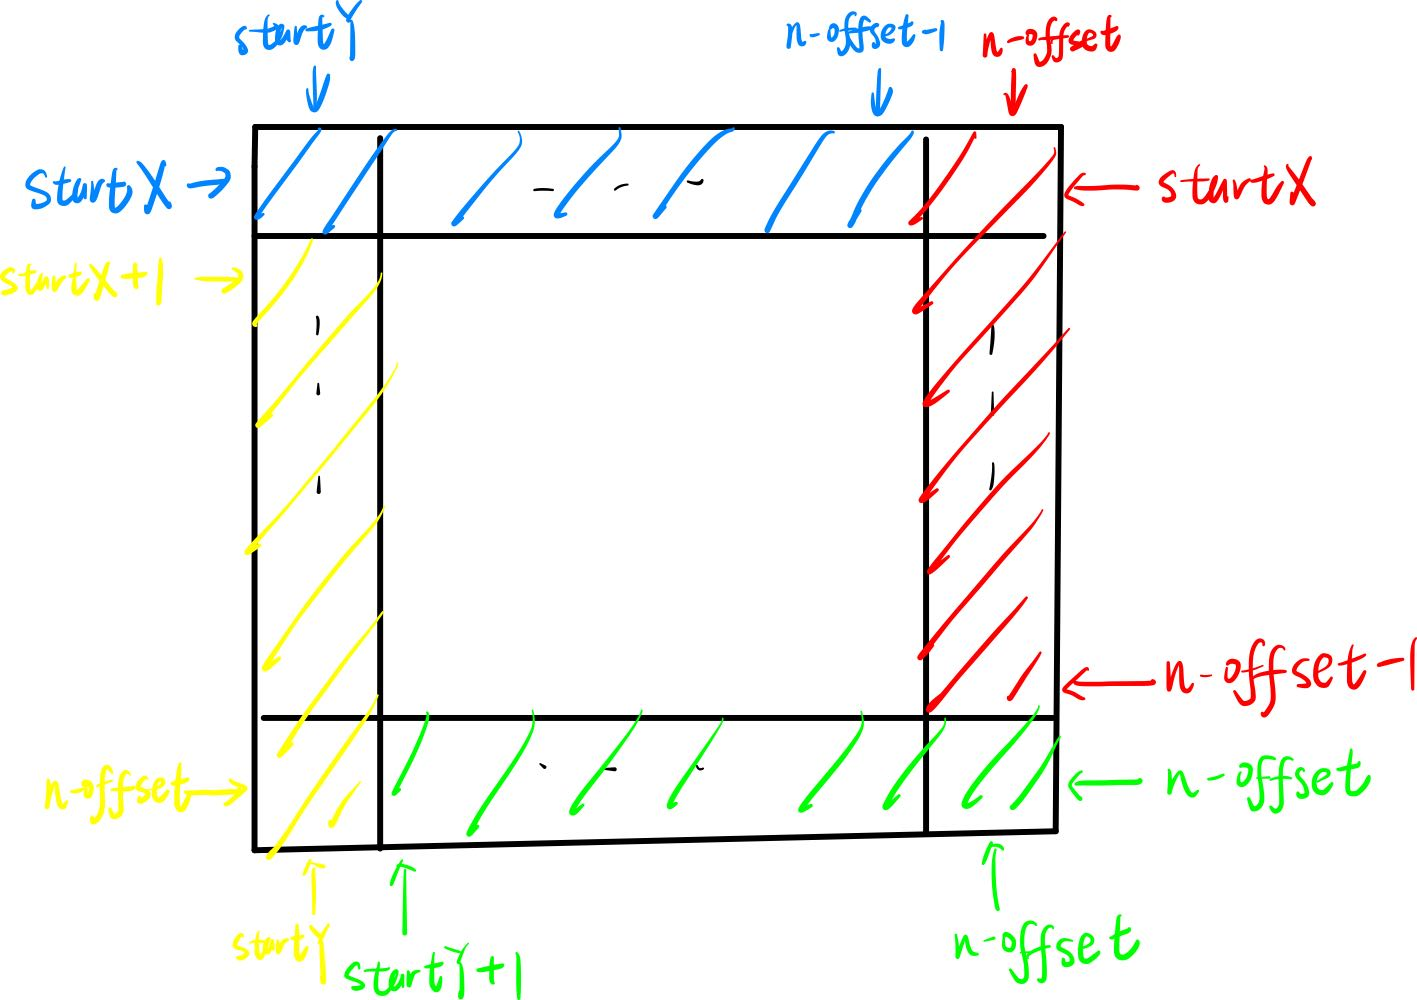

In [ ]:
# time: O(n^2), space: O(n^2)
# 右下左上为一个循环，每个循环是左闭右开！
class Solution:
    def generateMatrix(self, n: int) -> List[List[int]]:
        # 不要shallow list！注意看note中的链接!
        nums = [[0 for i in range(n)] for j in range(n)]
        count = 1
        # 每次循环开始的左上角格子的坐标
        startX, startY = 0, 0
        # loop表示循环的次数，mid表示中间格的index，只有n为奇mid才有意义！
        loopNum, mid = n // 2, n // 2
        # offset表示开的长度：“左闭”的终点为n-offset-1，“右开”的起点为n-offset; offset最大取到loopNum，即n//2
        # eg：第一次循环中“右”之后留一格给“下”
        for offset in range(1, loopNum + 1):
            # 右：行为startX不变，列从startY -> n-offset-1
            for Y in range(startY, n - offset):
                nums[startX][Y] = count
                count += 1
            # 下：列为n-offset不变，行从startX -> n-offset-1
            for X in range(startX, n - offset):
                nums[X][n - offset] = count
                count += 1
            # 左：类似右！行为n-offset不变，列从n-offset -> startY+1
            for Y in range(n - offset, startY, -1):
                nums[n - offset][Y] = count
                count += 1
            # 上：类似下！列为startY不变，行从n-offset -> startX+1
            for X in range(n - offset, startX, -1):
                nums[X][startY] = count
                count += 1
            startX += 1
            startY += 1
        # 如果n为偶，则中心点直接填完；如果n为奇，需要人为填写中心点
        if n % 2 != 0:
            nums[mid][mid] = count  
        return nums